In [39]:
from os import chdir, path, getcwd
for i in range(10):
    if path.isfile("checkcwd"):
        break
    chdir(path.pardir)
if path.isfile("checkcwd"):
    pass
else:
    raise Exception("Something went wrong. cwd=" + getcwd())

In [40]:
from collections import defaultdict

In [41]:
RATINGS_DIR = 'resources/ratings'


USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:131.0) Gecko/20100101 Firefox/131.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:130.0) Gecko/20100101 Firefox/130.0',
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/109.0',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.5790.170 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.0 Safari/605.1.15'
]


In [42]:
import os
rating_files = os.listdir(RATINGS_DIR)
len(rating_files)

43

In [43]:
rating_filepaths = [os.path.join(RATINGS_DIR, f) for f in rating_files]
uids_full = defaultdict(int)
fids_full = defaultdict(int)
for filepath in rating_filepaths:
    with open(filepath, 'r') as fr:
        lines = fr.readlines()
    for line in lines:
        splitted_line = line.split(sep=',')
        uids_full[int(splitted_line[0])] += 1
        fids_full[int(splitted_line[1])] += 1

In [44]:
sorted_uids = sorted(list(uids_full.items()), key=lambda x: x[1], reverse=True)
sorted_fids = sorted(list(fids_full.items()), key=lambda x: x[1], reverse=True)
filtered_fids = {k: v for k, v in fids_full.items() if v >= 100}
sorted_and_filtered_fids = sorted(list(filtered_fids.items()), key=lambda x: x[1], reverse=True)

with open('resources/data/uids_full.txt', 'w') as fw:
    for uid_item in sorted_uids:
        fw.write(f'{uid_item[0]}\n')

with open('resources/data/fids_full.txt', 'w') as fw:
    for fid_item in sorted_fids:
        fw.write(f'{fid_item[0]}\n')

with open('resources/data/fids_filtered.txt', 'w') as fw:
    for fid_item in sorted_and_filtered_fids:
        fw.write(f'{fid_item[0]}\n')

In [45]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=20):
    counts = [count for _, count in data]

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(counts, bins=bins, color='skyblue', edgecolor='black')
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

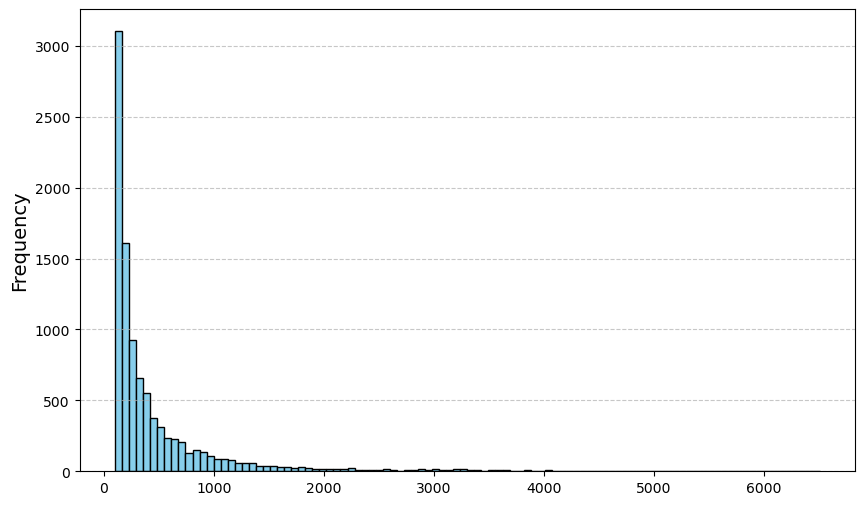

In [46]:
plot_histogram(sorted_and_filtered_fids, bins=100)

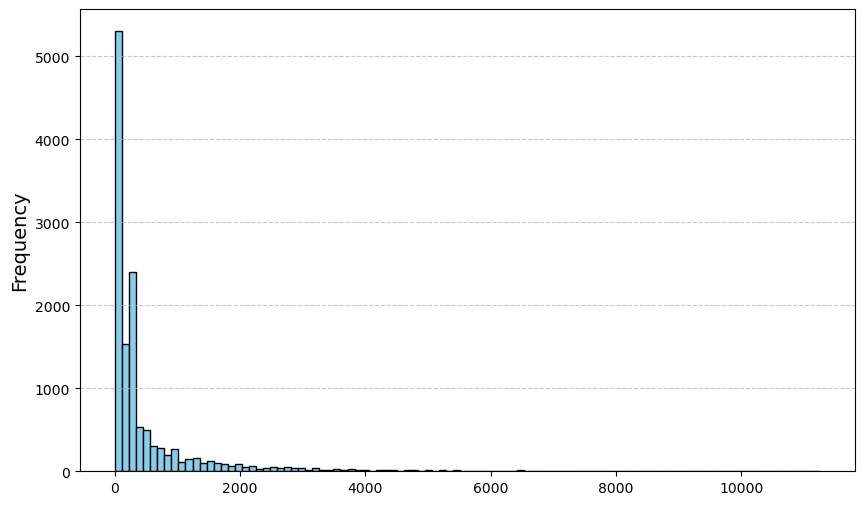

In [47]:
plot_histogram(sorted_uids, bins=100)

In [48]:
# sorted_uids_set = set(sorted_uids)
# sorted_and_filtered_fids_set = set(sorted_and_filtered_fids)

rating_filepaths = [os.path.join(RATINGS_DIR, f) for f in rating_files]
uids_final = defaultdict(int)
fids_final = defaultdict(int)
with open('resources/data/ratings.txt', 'w') as fw:
    buffer = []
    buffer_size = 10000
    for filepath in rating_filepaths:
        with open(filepath, 'r') as fr:
            lines = fr.readlines()
        for line in lines:
            splitted_line = line.split(sep=',')
            uid = int(splitted_line[0])
            fid = int(splitted_line[1])
            # print(uid, fid)
            if uid in uids_full and fid in filtered_fids:
                # print('yes')
                buffer.append(f'{uid},{fid},{splitted_line[2].strip()}')
                # Write the buffer to file when it reaches the specified size
                if len(buffer) >= buffer_size:
                    fw.write('\n'.join(buffer) + '\n')
                    buffer = []
        # uids_final[splitted_line[0]] += 1
        # fids_final[splitted_line[1]] += 1
    if buffer:
        fw.write('\n'.join(buffer) + '\n')

In [49]:
output_dir = 'resources/data/split_ratings'
with open('resources/data/ratings.txt', 'r') as fr:
    total_lines = sum(1 for _ in fr)

os.makedirs(output_dir, exist_ok=True)
lines_per_file = (total_lines + 9) // 10

with open('resources/data/ratings.txt', 'r') as fr:
    for i in range(10):
        output_file = os.path.join(output_dir, f'ratings_part_{i + 1}.txt')
        with open(output_file, 'w') as fw:
            for _ in range(lines_per_file):
                line = fr.readline()
                if not line:  # Stop if EOF is reached
                    break
                fw.write(line)

In [50]:
os.remove('resources/data/ratings.txt')

In [51]:
# def get_film_data(id: str):
#     film_url = f'https://www.imdb.com/title/tt{id}'
#     r = requests.get(
#         film_url,
#         headers={'User-Agent': random.choice(USER_AGENTS)}
#     )
#     soup = BeautifulSoup(r.text, 'html.parser').head
#     ld_json_script = soup.find('script', type='application/ld+json')
#     json_data = loads(ld_json_script.string)
#     return json_data

In [52]:
# film_id = '0910970'
# walle = get_film_data(film_id)

In [53]:
# walle['duration']
# dt = pd.Timedelta(walle['duration'])
# int(dt.total_seconds())

In [54]:
# test_fids = list(fids_full.keys())[:10]
# test_fids

In [55]:
# with open('test.csv', 'w') as fw:
#     # fw.write(f'fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration\n')
#     for fid in test_fids:
#         json_film = get_film_data(fid)
#         fw.write(f'"{fid}","{json_film['name']}","{json_film['description']}",{json_film['aggregateRating']['ratingCount']},')
#         fw.write(f'{json_film['aggregateRating']['ratingValue']},{json_film['contentRating']},')
#         fw.write(f'"{','.join(json_film['genre'])}","{json_film['keywords']}",{int(pd.Timedelta(json_film['duration']).total_seconds())}\n')

In [56]:
# def get_film_data(film_id: str):
#     """Fetches film data from IMDb."""
#     film_url = f'https://www.imdb.com/title/tt{film_id}'
#     try:
#         r = requests.get(
#             film_url,
#             headers={'User-Agent': random.choice(USER_AGENTS)}
#         )
#         if r.status_code != 200:
#             print(f"Failed to fetch data for ID {film_id}. Status code: {r.status_code}")
#             return None

#         soup = BeautifulSoup(r.text, 'html.parser').head
#         ld_json_script = soup.find('script', type='application/ld+json')
#         if not ld_json_script:
#             print(f"No ld+json script found for ID {film_id}")
#             return None

#         json_data = loads(ld_json_script.string)
#         return json_data

#     except requests.exceptions.RequestException as e:
#         print(f"Request failed for ID {film_id}: {e}")
#         return None
#     except Exception as e:
#         print(f"An error occurred for ID {film_id}: {e}")
#         return None

# def process_film(fid: str):
#     """Fetches film data and formats it as a CSV row."""
#     json_film = get_film_data(fid)
#     if not json_film:
#         return None
    
#     try:
#         name = unescape(json_film.get('name', ''))
        
#         description = unescape(json_film.get('description', ''))
#         rating_count = json_film.get('aggregateRating', {}).get('ratingCount', 0)
#         rating_value = json_film.get('aggregateRating', {}).get('ratingValue', 0.0)
#         content_rating = json_film.get('contentRating', '')
#         genre = unescape(','.join(json_film.get('genre', [])))
#         keywords = unescape(json_film.get('keywords', ''))
#         duration = int(pd.Timedelta(json_film.get('duration', 'PT0S')).total_seconds())
#         date_published = json_film.get('datePublished', '0000-01-01')
#         actors = unescape(','.join([actor['name'] for actor in json_film.get('actor', [])]))
#         directors = unescape(','.join([director['name'] for director in json_film.get('director', [])]))
#         image = json_film.get('image', '')

#         return f'{fid},"{name}","{description}",{rating_count},{rating_value},{content_rating},"{genre}","{keywords}",{duration},{date_published},"{actors}","{directors}","{image}"\n'
#     except Exception as e:
#         print(f"Error processing data for ID {fid}: {e}")
#         return None

# import time

# def main(test_fids):
#     """Writes film data to a CSV file sequentially with a delay between requests."""
#     with open('test.csv', 'w') as fw:
#         # Write the header
#         fw.write('fid,name,description,ratingCount,ratingValue,contentRating,genre,keywords,duration,datePublished,actor,director,image\n')

#         for fid in test_fids:
#             result = process_film(fid)
#             if result:
#                 fw.write(result)
#             time.sleep(5)


In [57]:
# main(test_fids)